<a href="https://colab.research.google.com/github/cbullock2003/Gender-Inequality-in-NBA-and-WNBA/blob/main/Final_Project_DIDA_325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Project - DIDA 325

Caitlin Bullock, William Kao, Ethan Like, Kaymora Roberts, Taylor Veneto

# Introduction

Our imagined position is that we are ESPN data analysts hired to look at gender inequality in basketball for a potential 30 for 30 episode. We plan on looking at where exactly that discrepency is coming from, and we are also aiming to bring awareness to the large disparities between the NBA and WNBA, despite being the same sport. We will especially be looking at relegation of salary.

One of the main reasons that there is more NBA data than WNBA data may be due to the popularity difference between the two leagues. More people watch the NBA than the WNBA and are more interesting in collected data such as shots, rebounds, assists, salary etc. It might impact the results of the data as the predictions and the graphs of the data will be inaccurate. This could lead to inaccurate conclusions being made based on the role position that we have.

This dataset was compiled by Ignacio Bengochea, who is associated with University Oberta of Cataluyna, but the data itself was from the NBA and WNBA recording statstics on its players. The dataset itself is from seven years ago, so it is not as recent as it could be. It gives player names as well as the statstics associated with that player in the season given, and also has columns displaying how much of their salary is allocated to specific stats, such as points or assists.



Here are our research questions:

1. How accurately can we predict a player's salary based on their stats between leagues?
2. How do the steals of the NBA and the WNBA players affect their salary earning?
3. Who is the highest earning player in each league and how do their stats (rebounds, assists, points) compare to one another?
4. How does salary per points compare between the two leagues?

# Dataset

Again, the data in this dataset came from the two leagues putting together the statistics on its players, but the dataset itself was created by Ignacio Bengochea of the University Oberta of Cataluyna.

In terms of cleaning the data, we did not drop any columns because there are so few to begin with, and we felt as if it was too early to make the call as to hich columns would and would not be necessary for our specific research questions. We did, however, drop any NaN data and saved that into a new dataframe to help with some of the regressions we will be running at a later date. We did add an indicator column to each dataset saying if it was male or female for when we had to merge the datasets for various research questions.

What columns represent:
- all numeric, with exception of player name, which is neither numeric nor categorical
- player : Each basketball player's full name
- games : Number of games played
- minutes : Number of minutes played
- points: Number of points
- rebds: Number of rebounds by the player
- assists: Number of assists by the player
- steals: Number of steals by the player
- salary: The salary of the player
- slry/pts.: Salary per point
- slry/rbds: Salary per rebound
- slry/asts	: Salary per assists
- slry/stls: 	Salary per steal
- slry/blks: Salary per block

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

In [ ]:
nba = pd.read_csv("/content/nba-stats_out.csv")
wnba = pd.read_csv("/content/wnba-stats_out.csv")

nba["League"]= "male"
wnba["League"]= "female"

In [ ]:
nba.head()

,player,games,minutes,points,rebds.,assists,steals,blocks,salary,slry/pts.,slry/rbds,slry/asts,slry/stls,slry/blks,League
0,Russell Westbrook,82,2788,2599,869,844,133,32,28530608,10977.0,32831.0,33804.0,214515.0,891581.0,male
1,James Harden,82,2952,2369,664,918,121,41,28299399,11945.0,42619.0,30827.0,233879.0,690229.0,male
2,Isaiah Thomas,77,2541,2217,207,454,70,15,6261395,2824.0,30248.0,13791.0,89448.0,417426.0,male
3,Anthony Davis,76,2736,2150,896,159,96,167,23775506,11058.0,26535.0,149531.0,247661.0,142368.0,male
4,Karl-Anthony Towns,82,2952,2058,1008,221,56,106,6216840,3020.0,6167.0,28130.0,111015.0,58649.0,male


In [ ]:
wnba.head()

,player,games,minutes,points,rebds.,assists,steals,blocks,salary,slry/pts.,slry/rbds,slry/asts,slry/stls,slry/blks,League
0,Tina Charles,34,1094,669,319,88,0,23,105000,156.0,329.0,1193.0,NaN,4565.0,female
1,Breanna Stewart,33,1085,656,287,89,1,52,105000,160.0,365.0,1179.0,105000.0,2019.0,female
2,Sylvia Fowles,34,1047,642,353,51,1,68,105000,163.0,297.0,2058.0,105000.0,1544.0,female
3,Nneka Ogwumike,34,1054,639,261,71,1,17,105000,164.0,402.0,1478.0,105000.0,6176.0,female
4,Skylar Diggins-Smith,34,1162,629,119,197,1,27,105000,166.0,882.0,532.0,105000.0,3888.0,female


In [ ]:
nba_clean = nba.dropna()
nba_clean.head()

,player,games,minutes,points,rebds.,assists,steals,blocks,salary,slry/pts.,slry/rbds,slry/asts,slry/stls,slry/blks,League
0,Russell Westbrook,82,2788,2599,869,844,133,32,28530608,10977.0,32831.0,33804.0,214515.0,891581.0,male
1,James Harden,82,2952,2369,664,918,121,41,28299399,11945.0,42619.0,30827.0,233879.0,690229.0,male
2,Isaiah Thomas,77,2541,2217,207,454,70,15,6261395,2824.0,30248.0,13791.0,89448.0,417426.0,male
3,Anthony Davis,76,2736,2150,896,159,96,167,23775506,11058.0,26535.0,149531.0,247661.0,142368.0,male
4,Karl-Anthony Towns,82,2952,2058,1008,221,56,106,6216840,3020.0,6167.0,28130.0,111015.0,58649.0,male


In [ ]:
wnba_clean = wnba.dropna()
wnba_clean.head()

,player,games,minutes,points,rebds.,assists,steals,blocks,salary,slry/pts.,slry/rbds,slry/asts,slry/stls,slry/blks,League
1,Breanna Stewart,33,1085,656,287,89,1,52,105000,160.0,365.0,1179.0,105000.0,2019.0,female
2,Sylvia Fowles,34,1047,642,353,51,1,68,105000,163.0,297.0,2058.0,105000.0,1544.0,female
3,Nneka Ogwumike,34,1054,639,261,71,1,17,105000,164.0,402.0,1478.0,105000.0,6176.0,female
4,Skylar Diggins-Smith,34,1162,629,119,197,1,27,105000,166.0,882.0,532.0,105000.0,3888.0,female
5,Jewell Loyd,34,1057,601,108,115,1,13,105000,174.0,972.0,913.0,105000.0,8076.0,female


### Question 1: How accurately can we predict a player's salary based on their stats?

In [ ]:
nba_clean.columns

Index(['player', 'games', 'minutes', 'points', 'rebds.', 'assists', 'steals',
       'blocks', 'salary', 'slry/pts.', 'slry/rbds', 'slry/asts', 'slry/stls',
       'slry/blks', 'League'],
      dtype='object')

In [ ]:
#NBA with slry/[stat]

X = nba_clean[['games', 'minutes', 'points', 'rebds.', 'assists', 'steals',
       'blocks', 'slry/pts.', 'slry/rbds', 'slry/asts', 'slry/stls',
       'slry/blks']]
X = pd.get_dummies(X, drop_first=True).astype("float32")


y = nba_clean["salary"]

In [ ]:
X = sm.tools.tools.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     20.49
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.85e-27
Time:                        19:14:46   Log-Likelihood:                -3168.3
No. Observations:                 187   AIC:                             6363.
Df Residuals:                     174   BIC:                             6405.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.586e+06   2.03e+06     -0.781      0.4

In [ ]:
#testing accuracy: NBA

yhat = model.predict()
residuals = y - yhat
residuals

,salary
0,-1.658626e+06
1,4.577623e+06
2,-1.055201e+07
3,-2.242918e+06
4,-1.659988e+07
...,...
282,-1.811110e+06
296,-6.237647e+06
298,9.651692e+03
299,4.549431e+05


In [ ]:
np.std(residuals)


5518662.926761077

Text(0, 0.5, 'Residual')

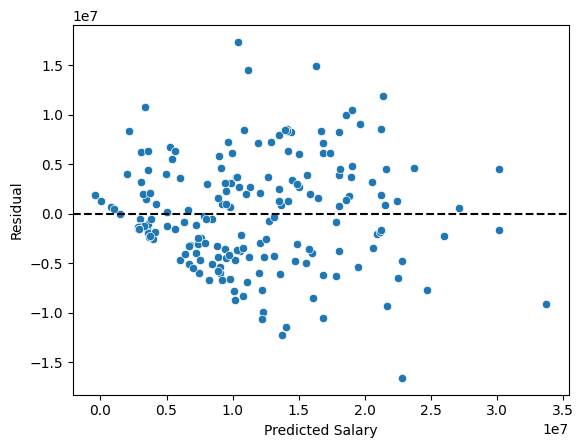

In [ ]:
ax = sns.scatterplot(x=yhat, y=residuals)
ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel("Predicted Salary")
plt.ylabel("Residual")

In [ ]:
wnba_clean.columns

Index(['player', 'games', 'minutes', 'points', 'rebds.', 'assists', 'steals',
       'blocks', 'salary', 'slry/pts.', 'slry/rbds', 'slry/asts', 'slry/stls',
       'slry/blks', 'League'],
      dtype='object')

In [ ]:
#WNBA with slry/[stat]

X1 = wnba_clean[['games', 'minutes', 'points', 'rebds.', 'assists',
       'blocks', 'slry/pts.', 'slry/rbds', 'slry/asts', 'slry/stls',
       'slry/blks']]
X1 = pd.get_dummies(X1, drop_first=True).astype("float32")

y1 = wnba_clean["salary"]

In [ ]:
X1 = sm.tools.tools.add_constant(X1)
model = sm.OLS(y1, X1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -1.636
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               1.00
Time:                        00:56:28   Log-Likelihood:                 547.91
No. Observations:                  30   AIC:                            -1072.
Df Residuals:                      18   BIC:                            -1055.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.05e+05   1.99e-08   5.28e+12      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
#testing accuracy: WNBA

yhat2 = model.predict()
residuals2 = y1 - yhat2
residuals2

,salary
1,-2.735760e-09
2,-2.750312e-09
3,-2.793968e-09
4,-2.764864e-09
5,-2.808520e-09
6,-2.808520e-09
8,-2.764864e-09
10,-2.881279e-09
13,-2.866727e-09
15,-2.793968e-09


Text(0, 0.5, 'Residual')

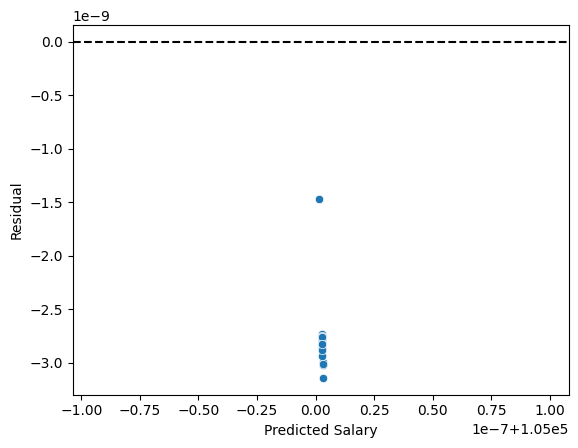

In [ ]:
ax = sns.scatterplot(x=yhat2, y=residuals2)
ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel("Predicted Salary")
plt.ylabel("Residual")

In [ ]:
np.std(residuals2)

2.674321086971537e-10

In [ ]:
#NBA without slry/[stat]

X2 = nba_clean[['games', 'minutes', 'points', 'rebds.', 'assists', 'steals',
       'blocks']]
X2 = pd.get_dummies(X2, drop_first=True).astype("float32")

y2 = nba_clean["salary"]

In [ ]:
X2 = sm.tools.tools.add_constant(X2)
model = sm.OLS(y2, X2).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     18.95
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           8.27e-19
Time:                        01:08:40   Log-Likelihood:                -3198.8
No. Observations:                 187   AIC:                             6414.
Df Residuals:                     179   BIC:                             6439.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.102e+06   1.66e+06      3.082      0.0

In [ ]:
#testing accuracy (NBA w/o slry/[stat])

yhat3 = model.predict()
residuals3 = y2 - yhat3
residuals3

,salary
0,-1.142657e+06
1,2.423571e+06
2,-1.430310e+07
3,-2.682544e+06
4,-1.746364e+07
...,...
282,-2.847596e+06
296,2.139959e+06
298,-3.251292e+05
299,-1.206030e+06


Text(0, 0.5, 'Residual')

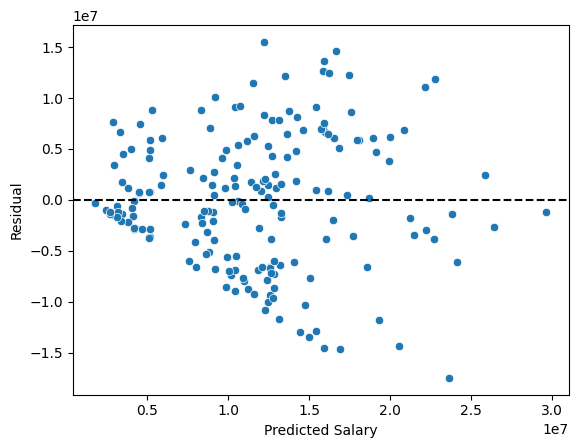

In [ ]:
ax = sns.scatterplot(x=yhat3, y=residuals3)
ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel("Predicted Salary")
plt.ylabel("Residual")

In [ ]:
np.std(residuals3)

6496915.637856695

In [ ]:
#WNBA without slry/[stat]

X3 = wnba_clean[['games', 'minutes', 'points', 'rebds.', 'assists', 'steals',
       'blocks']]
X3 = pd.get_dummies(X3, drop_first=True).astype("float32")

y3 = wnba_clean["salary"]

In [ ]:
X3 = sm.tools.tools.add_constant(X3)
model = sm.OLS(y3, X3).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -3.143
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               1.00
Time:                        01:13:15   Log-Likelihood:                 579.47
No. Observations:                  30   AIC:                            -1143.
Df Residuals:                      22   BIC:                            -1132.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.05e+05   2.02e-09   5.19e+13      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [ ]:
#testing accuracy (WNBA w/o slry/[stat])

yhat4 = model.predict()
residuals4 = y3 - yhat4
residuals4

,salary
1,1.426088e-09
2,1.484295e-09
3,1.440640e-09
4,1.149601e-09
5,1.135049e-09
6,1.222361e-09
8,1.222361e-09
10,1.120497e-09
13,1.091394e-09
15,1.382432e-09


Text(0, 0.5, 'Residual')

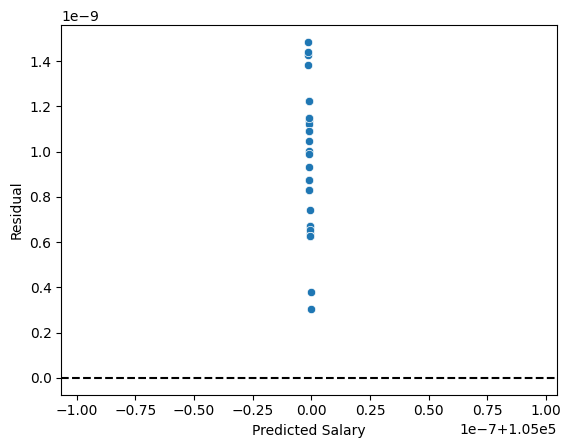

In [ ]:
ax = sns.scatterplot(x=yhat4, y=residuals4)
ax.axhline(y=0, color='black', linestyle='dashed')
plt.xlabel("Predicted Salary")
plt.ylabel("Residual")

In [ ]:
np.std(residuals4)

3.036050190883729e-10

In [ ]:
#nba
nba_clean["salary"].max()


34682550

In [ ]:
nba_clean["salary"].min()

1312611

In [ ]:
#wnba
wnba_clean["salary"].max()

105000

In [ ]:
wnba_clean["salary"].min()


105000

***Discussion:***

I ran a regression model for each league, and two for each, one with the slry/[stat] columns, and one without to show the differences between the two. It did not make much of a difference for the WNBA, but the regression model with the slry/[stat] column for the NBA dataset was a little bit more accurate, however neither were extremely accurate in predicting salary.


NBA Analysis


The standard deviation of this comes out to 5518662.93 with the slry/[stat] columns, meaning that this regression model will put us within ±5518662.93 of the actual salary that the player will be receiving. Without those columns, the standard deviation is 6496915.64. The plot of the residuals for both models is also very spread out, with no real trend between the points, so this model is either not very accurate, or (more likely) there is such a wide range of potential salaries for a player (difference between max and min is 33369939) that predicting is almost futile.


WNBA Analysis


Because the salary is the same for each player in the WNBA, as seen through the same max and min values, there is nothing for this specific regression to predict. This could be an issue within the dataset itself, however it is more likely that this has to do with how salaries are distributed in the WNBA, with each of the teams paying their players the same according to the strict budget they are set to.


Source (written in 2024, so not exact to this data but has similar ideas): https://herhoopstats.com/salary-cap-sheet/wnba/summary/2024/


### Question 2: How do the steals of the NBA and the WNBA players affect their salary earning?

In [ ]:
nba_wnba = pd.concat([nba,wnba])

#citation: https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/


In [ ]:
nba_wnba

,player,games,minutes,points,rebds.,assists,steals,blocks,salary,slry/pts.,slry/rbds,slry/asts,slry/stls,slry/blks,League
0,Russell Westbrook,82,2788,2599,869,844,133,32,28530608,10977.0,32831.0,33804.0,214515.0,891581.0,male
1,James Harden,82,2952,2369,664,918,121,41,28299399,11945.0,42619.0,30827.0,233879.0,690229.0,male
2,Isaiah Thomas,77,2541,2217,207,454,70,15,6261395,2824.0,30248.0,13791.0,89448.0,417426.0,male
3,Anthony Davis,76,2736,2150,896,159,96,167,23775506,11058.0,26535.0,149531.0,247661.0,142368.0,male
4,Karl-Anthony Towns,82,2952,2058,1008,221,56,106,6216840,3020.0,6167.0,28130.0,111015.0,58649.0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Chelsea Hopkins,2,8,0,0,0,0,0,105000,NaN,NaN,NaN,NaN,NaN,female
161,Chelsea Hopkins,1,1,0,0,0,0,0,105000,NaN,NaN,NaN,NaN,NaN,female
162,Feyonda Fitzgerald,2,8,0,4,1,0,0,105000,NaN,26250.0,105000.0,NaN,NaN,female
163,Sophie Brunner,3,12,0,3,0,0,0,105000,NaN,35000.0,NaN,NaN,NaN,female


In [ ]:
top_players = nba_wnba.sort_values(by='slry/stls', ascending=False).head(30)

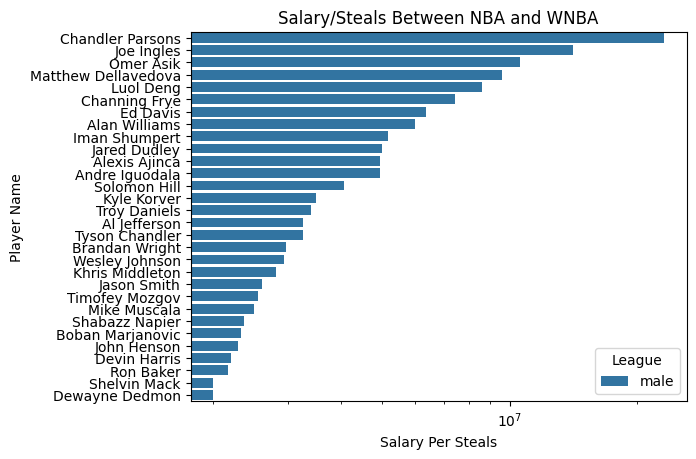

In [ ]:
sns.barplot(top_players, x="slry/stls", y="player",hue="League", orient="h")
plt.xscale('log')
plt.xlabel("Salary Per Steals")
plt.ylabel("Player Name")
plt.title("Salary/Steals Between NBA and WNBA")
plt.show()

#https://matplotlib.org/stable/users/explain/axes/axes_scales.html (scaling the x-axis)

***Discussion:***


In basketball, a team’s defense is critical for a successful win of a game. In light of that fact, many statisticians used the team’s defense , such as steals, to illustrate the correlation between victory and defense. We know this as many data analysts have found that “steals are weighed nine times more than a marginal point in basketball.” This is an important factor in the NBA regression in Question 1 as steals is illustrated to have an impact as it has a P-value less than 0.05. However it is hard to make that same conclusion for WNBA as the data for the steals are not of use as the values are only of 1 and 0. This illustrates some redundancies  in the data.
(source: https://statmodeling.stat.columbia.edu/2014/03/26/steal-really-worth-9-points/)


And so in light of that, the bar plot above for Question 2 illustrates significant differences in how much the NBA and WNBA players are paid. It mainly features NBA players, so it is fair to assume that there is a severe disparity in earnings between leagues. This highlights that the salary per steals is not of comparable value between the WNBA and NBA due to this large gap in their salaries, as NBA players will be making far more in general than WNBA players will be.


### Question 3: Who is the highest earning player in each league and how do their stats (rebounds, assists, points) compare to one another?

In [ ]:
nba_clean.loc[nba_clean.salary==nba_clean.salary.max()]

#rebounds: 360
#assists: 528
#points: 2024

,player,games,minutes,points,rebds.,assists,steals,blocks,salary,slry/pts.,slry/rbds,slry/asts,slry/stls,slry/blks,League
7,Stephen Curry,80,2640,2024,360,528,143,16,34682550,17135.0,96340.0,65686.0,242535.0,2167659.0,male


In [ ]:
wnba_clean.loc[wnba_clean.salary==wnba_clean.salary.max()]

#no direct correlation because so many players make the salary cap
#not very close though across players, likely has to do with the fact that there are less games in WNBA season

#wnba salary (2024): https://herhoopstats.com/salary-cap-sheet/wnba/summary/2024/


,player,games,minutes,points,rebds.,assists,steals,blocks,salary,slry/pts.,slry/rbds,slry/asts,slry/stls,slry/blks,League
1,Breanna Stewart,33,1085,656,287,89,1,52,105000,160.0,365.0,1179.0,105000.0,2019.0,female
2,Sylvia Fowles,34,1047,642,353,51,1,68,105000,163.0,297.0,2058.0,105000.0,1544.0,female
3,Nneka Ogwumike,34,1054,639,261,71,1,17,105000,164.0,402.0,1478.0,105000.0,6176.0,female
4,Skylar Diggins-Smith,34,1162,629,119,197,1,27,105000,166.0,882.0,532.0,105000.0,3888.0,female
5,Jewell Loyd,34,1057,601,108,115,1,13,105000,174.0,972.0,913.0,105000.0,8076.0,female
6,Maya Moore,34,1064,588,170,119,1,13,105000,178.0,617.0,882.0,105000.0,8076.0,female
8,Candace Parker,33,1013,557,277,141,1,56,105000,188.0,379.0,744.0,105000.0,1875.0,female
10,Tiffany Hayes,33,996,537,125,79,1,6,105000,195.0,840.0,1329.0,105000.0,17500.0,female
13,Chelsea Gray,34,1132,503,112,149,1,6,105000,208.0,937.0,704.0,105000.0,17500.0,female
15,Glory Johnson,33,1023,491,300,52,1,13,105000,213.0,350.0,2019.0,105000.0,8076.0,female


In [ ]:
#making visualizations:

steph_curry = nba_clean.loc[nba_clean.salary==nba_clean.salary.max()]
steph_curry

,player,games,minutes,points,rebds.,assists,steals,blocks,salary,slry/pts.,slry/rbds,slry/asts,slry/stls,slry/blks,League
7,Stephen Curry,80,2640,2024,360,528,143,16,34682550,17135.0,96340.0,65686.0,242535.0,2167659.0,male


In [ ]:
breanna_stewart = wnba_clean.loc[wnba_clean.salary==wnba_clean.salary.max()].head(1)
breanna_stewart

,player,games,minutes,points,rebds.,assists,steals,blocks,salary,slry/pts.,slry/rbds,slry/asts,slry/stls,slry/blks,League
1,Breanna Stewart,33,1085,656,287,89,1,52,105000,160.0,365.0,1179.0,105000.0,2019.0,female


In [ ]:
wnba_nba_highest_stats = pd.concat([steph_curry,breanna_stewart])
wnba_nba_highest_stats

,player,games,minutes,points,rebds.,assists,steals,blocks,salary,slry/pts.,slry/rbds,slry/asts,slry/stls,slry/blks,League
7,Stephen Curry,80,2640,2024,360,528,143,16,34682550,17135.0,96340.0,65686.0,242535.0,2167659.0,male
1,Breanna Stewart,33,1085,656,287,89,1,52,105000,160.0,365.0,1179.0,105000.0,2019.0,female


In [ ]:
nba_wnba_steph_breanna = pd.melt(wnba_nba_highest_stats, id_vars=["player"],
                                 value_vars=["points", "rebds.", "assists"],
                                 var_name="stats")

#pd.melt citation: https://www.geeksforgeeks.org/python-pandas-melt/
#https://pandas.pydata.org/docs/reference/api/pandas.melt.html

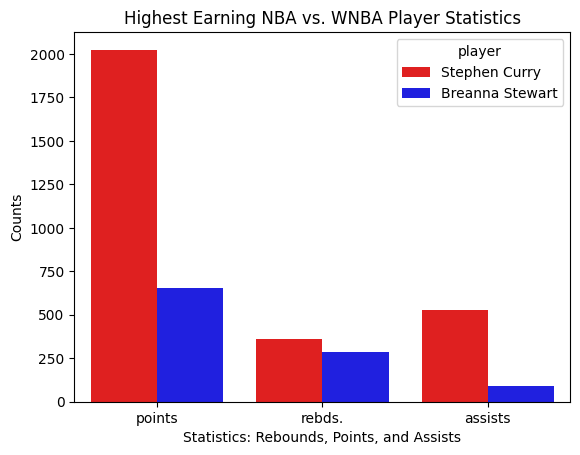

In [ ]:
sns.barplot(nba_wnba_steph_breanna, x="stats", y="value", hue="player", errorbar=None, palette=["red", "blue"])
plt.xlabel("Statistics: Rebounds, Points, and Assists")
plt.ylabel("Counts")
plt.title("Highest Earning NBA vs. WNBA Player Statistics")
plt.show()

***Discussion:***

From the NBA, the highest paid athlete is Stephen Curry, with the season stats of 360 rebounds, 528 assists, and 2024 points. On the other hand, since the WNBA salary is the same, there was no highest paid player because they all got paid the same amount. Because of this, there is no direct correlation that can be drawn between a highest paid player in the NBA and a highest paid player in the WNBA. However, just looking at the rebounds, assists, and points for WNBA players, it is clear that Stephen Curry's stats are far higher than any of the WNBA players, which could also have to do with the fact that there are more games in a NBA season rather than a WNBA season, with the only exception being rebounds, as that statstic were much closer than the other two statistics. For the sake of the visualization, we showed the difference between Steph Curry and Breanna Stewart, who was chosen at random to just visually show the difference between the two stats.

### Question 4: How does salary per points compare between the two leagues?

In [ ]:
nba_wnba = pd.concat([nba,wnba])

In [ ]:
nba_wnba

,player,games,minutes,points,rebds.,assists,steals,blocks,salary,slry/pts.,slry/rbds,slry/asts,slry/stls,slry/blks,League
0,Russell Westbrook,82,2788,2599,869,844,133,32,28530608,10977.0,32831.0,33804.0,214515.0,891581.0,male
1,James Harden,82,2952,2369,664,918,121,41,28299399,11945.0,42619.0,30827.0,233879.0,690229.0,male
2,Isaiah Thomas,77,2541,2217,207,454,70,15,6261395,2824.0,30248.0,13791.0,89448.0,417426.0,male
3,Anthony Davis,76,2736,2150,896,159,96,167,23775506,11058.0,26535.0,149531.0,247661.0,142368.0,male
4,Karl-Anthony Towns,82,2952,2058,1008,221,56,106,6216840,3020.0,6167.0,28130.0,111015.0,58649.0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Chelsea Hopkins,2,8,0,0,0,0,0,105000,NaN,NaN,NaN,NaN,NaN,female
161,Chelsea Hopkins,1,1,0,0,0,0,0,105000,NaN,NaN,NaN,NaN,NaN,female
162,Feyonda Fitzgerald,2,8,0,4,1,0,0,105000,NaN,26250.0,105000.0,NaN,NaN,female
163,Sophie Brunner,3,12,0,3,0,0,0,105000,NaN,35000.0,NaN,NaN,NaN,female


In [ ]:
nba["salary"].mean()

8939685.01910828

In [ ]:
nba_wnba.dtypes

,0
player,object
games,int64
minutes,int64
points,int64
rebds.,int64
assists,int64
steals,int64
blocks,int64
salary,int64
slry/pts.,float64


In [ ]:
wnba

,player,games,minutes,points,rebds.,assists,steals,blocks,salary,slry/pts.,slry/rbds,slry/asts,slry/stls,slry/blks,League
0,Tina Charles,34,1094,669,319,88,0,23,105000,156.0,329.0,1193.0,NaN,4565.0,female
1,Breanna Stewart,33,1085,656,287,89,1,52,105000,160.0,365.0,1179.0,105000.0,2019.0,female
2,Sylvia Fowles,34,1047,642,353,51,1,68,105000,163.0,297.0,2058.0,105000.0,1544.0,female
3,Nneka Ogwumike,34,1054,639,261,71,1,17,105000,164.0,402.0,1478.0,105000.0,6176.0,female
4,Skylar Diggins-Smith,34,1162,629,119,197,1,27,105000,166.0,882.0,532.0,105000.0,3888.0,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Chelsea Hopkins,2,8,0,0,0,0,0,105000,NaN,NaN,NaN,NaN,NaN,female
161,Chelsea Hopkins,1,1,0,0,0,0,0,105000,NaN,NaN,NaN,NaN,NaN,female
162,Feyonda Fitzgerald,2,8,0,4,1,0,0,105000,NaN,26250.0,105000.0,NaN,NaN,female
163,Sophie Brunner,3,12,0,3,0,0,0,105000,NaN,35000.0,NaN,NaN,NaN,female


In [ ]:
nba_wnba=nba_wnba.dropna()

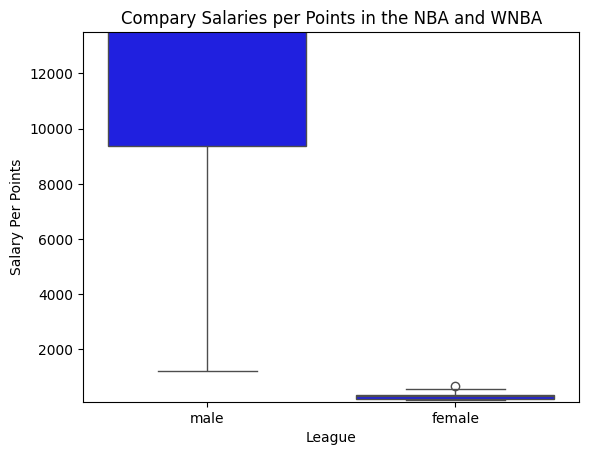

In [ ]:
sns.boxplot(nba_wnba,x="League",y="slry/pts.",color="blue")
plt.title("Compary Salaries per Points in the NBA and WNBA")
plt.ylabel("Salary Per Points")
plt.xlabel("League")
plt.ylim(100,13500)
plt.style.use("ggplot")

***Discussion:***

The boxplot above highlights the disparities in the salary between the NBA and WNBA. We can see that even the lowest paid NBA player gets paid far more per point than the WNBA players. This shows the significant gap between the leagues rather than an individual player's performance. In other words, the salary per points relies more on league than how well the athlete plays in the game. No further information would give any more insight into the answer to the question, the answer to which is very clear: every NBA player gets paid more per point than every WNBA player.

# Conclusions

**Question 1:** The linear regression models ran to predict were not particularly accurate for either league. All of the WNBA players made the same amount, so there was nothing for the model to predict. The NBA models were also not particularly accurate due to the fact that there is such a wide range of salaries that NBA players can earn. Even without the slry/[stat] column, neither of these regression models were very accurate due to the nature of the datasets.

**Question 2:** Our analysis showed that the NBA players make far more than the WNBA players, so this visualization that we made based on this question only showed how steals affected the NBA players as opposed to both leagues. But simply due to this fact, it is also apparent that steals per game affect the salary of NBA players far more than the salary of WNBA players.

**Question 3:** The highest earning player in the NBA is Stephen Curry, and he had 360 rebounds, 528 assists, and 2024 points. The WNBA players, on the other hand, all made the same amount, so there was no highest earning player, due to how the salary cap works in the WNBA. Because of this, there were no direct correlations to draw because it would be comparing one player to all of the players in the WNBA. Even then, the rebounds, assists, and points for the WNBA players is not consistent enough to make one blanket statement about how these stats affect their salary. The visualization created for this shows the difference between Stephen Curry and Breanna Stewart, who was chosen from the WNBA players at random to show the difference between the leagues.

**Question 4:** Once again, the analysis completed for this research question emphasized the difference in salary between leagues. Even the lowest paid NBA player makes far more than the WNBA players, so allocation of salary depends far more on what league a player is in rather than how many points they score in the game. NBA players make much more per point than the WNBA players make.


All in all, our analysis was mostly effective. The elements holding us back from having more in depth analysis was the discrepencies between the NBA and WNBA in terms of salary. The WNBA dataset also had some funky things happening with it, such as the salary column all having the same value and the steals columns all having a value of 1. This was an issue with the data itself, which held back our analysis. Perhaps using a more recent dataset would help with that problem if the WNBA keeps better records now than it did seven years ago, the season this data came from. But overall, the methods of analysis we chose were effective for the research questions that we asked.